# K-Means Clustering Algorithm
### Author: Beixian Gu

## Table of content
- Introduction
- Mathematical Description
- Applications on Datasets


## Introduction

K-Means is a type of partitioning clustering, that is, division of objects into clusters such that each object lies in exactly one cluster. It is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

![k-means image](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

## Mathematical Description

The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). The main idea is to define k centroids, one for each cluster.

The main steps are:

1. **Initialization**: Randomly initialize K cluster centroids.
2. **Assignment step**: Assign each example to the closest cluster centroid.
3. **Move centroid step**: Compute the new centroid (mean) of each cluster.

The mathematical objective of the K-Means clustering algorithm is to minimize the sum of the Euclidean distances between each data point in the dataset and the centroid of the cluster it was assigned to.

The objective function is:

![Objective function](https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922)

where:
- '||xi - vj||' is the Euclidean distance between xi and vj.
- 'J' is the number of data points.
- 'n' is the number of clusters.
- 'μ' is the mean of the observations in the cluster.

The algorithm is deemed to have converged when the assignments no longer change. There is no guarantee that the optimum is found using this algorithm.

The standard algorithm was first proposed by Stuart Lloyd of the Bell Labs in 1957 as a technique for pulse-code modulation, although it wasn't published as a journal article until 1982.



## Application on USA housing dataset


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [9]:
# Read the data
df = pd.read_csv('iris.csv')
# Select the features
X = df.drop('species', axis=1)
# Data exploration
print(df.head())
print(df.describe())

# Check for missing values
print(df.isnull().sum())



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
sepal_length    0
sepal_width     0
petal_leng

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

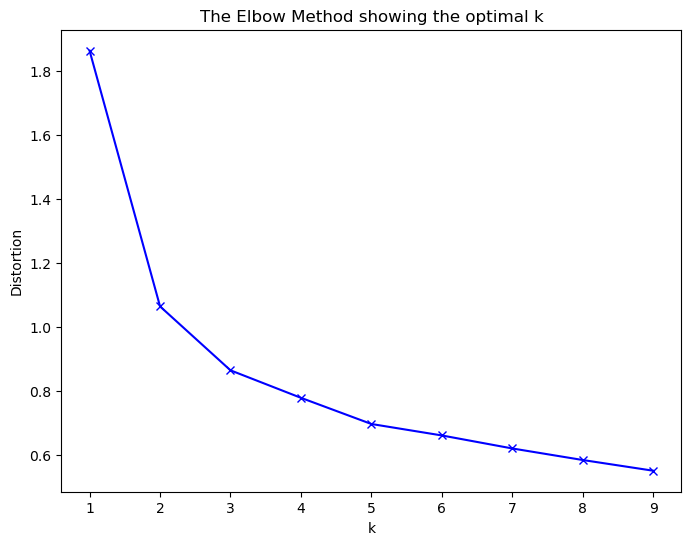

In [10]:
# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('species', axis=1))

# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(scaled_df)
    distortions.append(sum(np.min(cdist(scaled_df, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

# Plot the elbow
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



From the above plot, we can observe that the "elbow" is the number 3 which is optimal for this case. 
Now we can run a KMeans using as n_clusters the number 3.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


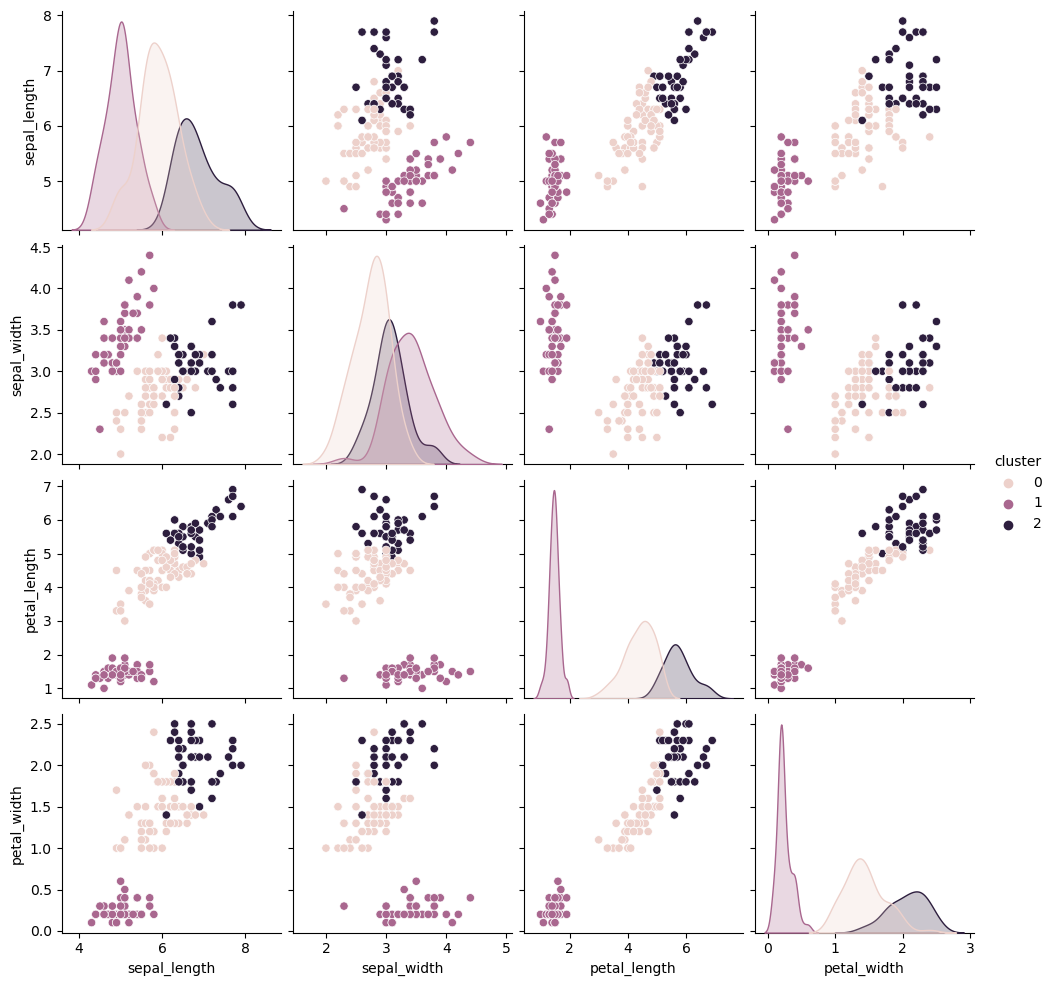

In [14]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42) # choose the number of clusters
kmeans.fit(X)

# Add the cluster labels for each data point to the dataframe
df['cluster'] = kmeans.labels_

# Visualize the clusters using pairplot
sns.pairplot(df, hue='cluster', vars=X.columns)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


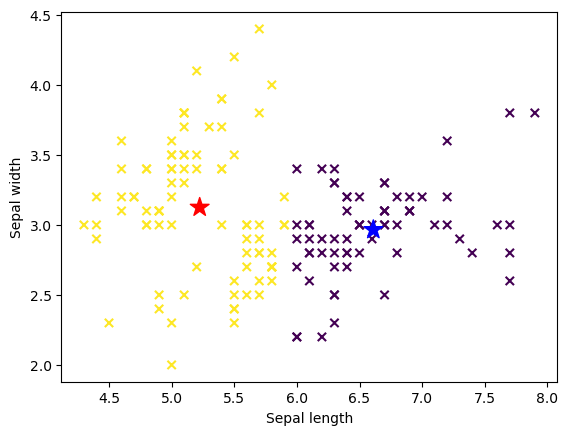

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('iris.csv')

# Select the features
X = df[['sepal_length', 'sepal_width']]

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=100, tol=0.01) 
kmeans.fit(X)

# Get the cluster labels for each data point
clusters = kmeans.labels_

# Get the final centroids
centroids = kmeans.cluster_centers_

# Plot the data points with their respective cluster colors
plt.scatter(X['sepal_length'], X['sepal_width'], c=clusters, cmap='viridis', marker='x')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color = ["blue", "red"], marker='*', s=200)

plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.show()
